Одна з найбільш поширених **проблем**, що зустрічаються в computer science - це проблема сортування якогось набору даних.

Сортування - одна з найкраще вивчених областей CS і це має ефект в тому числі на те, що вам майже ніколи не доведеться реалізовувати свої алгоритми сортування. Але важливо розуміти деякі властивості цього класу алгоритмів, щоб навіть з готових імплементацій обрати правильну.

Також, алгоритми сортування іноді є прекрасним ілюстративним прикладом для **дизайну алгоритмів**.

In [63]:
SIZE = 1000

In [64]:
original_lst = list(range(SIZE))

In [65]:
import random

Перший алгоритм сортування, що ми розглянемо, називається selection sort.
Він влаштований дуже просто: два вкладених цикли порівнюють елементи між собою. 
В кінці другого цикла найменший елемент та елемент з першого цикла міняють місцям.

Асимптотична складність:

* Найгірший випадок: O(n**2)
* Найкращий випадок: O(n**2)
* Середній випадок: O(n**2)

[Народний танок в якості ілюстрації](https://youtu.be/0-W8OEwLebQ?list=PLOmdoKois7_FK-ySGwHBkltzB11snW7KQ)

In [66]:
def selection_sort(arr):
    size = len(arr)
    for i in range(size):
        min = i
        for j in range(i, size):
            if arr[j] < arr[min]:
                min = j
        arr[i], arr[min] = arr[min], arr[i]

In [67]:
random.shuffle(original_lst)
print(original_lst)
selection_sort(original_lst)
print(original_lst)

[204, 8, 269, 181, 170, 963, 878, 697, 767, 709, 313, 916, 928, 725, 312, 562, 791, 643, 467, 651, 956, 45, 79, 101, 449, 110, 319, 527, 387, 206, 703, 464, 610, 237, 636, 86, 541, 320, 806, 247, 871, 931, 165, 84, 827, 747, 55, 980, 438, 611, 591, 599, 662, 383, 913, 56, 865, 755, 397, 76, 951, 430, 466, 139, 479, 544, 900, 215, 194, 808, 492, 261, 867, 37, 277, 463, 836, 526, 513, 368, 134, 24, 864, 694, 993, 704, 581, 130, 523, 317, 158, 485, 986, 121, 93, 29, 512, 614, 607, 866, 144, 991, 353, 294, 674, 311, 198, 43, 923, 89, 970, 454, 105, 824, 278, 630, 873, 508, 425, 122, 724, 823, 637, 914, 635, 475, 737, 803, 732, 701, 33, 758, 256, 785, 496, 262, 944, 992, 933, 723, 443, 654, 279, 63, 504, 796, 776, 641, 292, 162, 68, 554, 96, 902, 160, 38, 308, 218, 990, 869, 792, 201, 414, 188, 406, 715, 535, 263, 47, 984, 619, 339, 221, 34, 592, 59, 354, 259, 536, 30, 145, 180, 749, 942, 27, 618, 72, 623, 303, 605, 642, 937, 560, 347, 62, 379, 280, 558, 695, 315, 67, 748, 273, 285, 918, 7,

In [68]:
%%timeit

random.shuffle(original_lst)
selection_sort(original_lst)

12.9 ms ± 231 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [69]:
import random

from time import time
from functools import partial
from typing import Callable, Union, List, Iterable


def function_timer(function: Callable):
    start_time = time()
    function()
    return time() - start_time

def time_algs_by_mean(func: Callable, 
                      test_num: int, 
                      range_bounds: List[int], 
                      type_constr: type = list,
                      preparation: Callable = lambda arr: arr) -> List[float]:
    algorith_times = list()
    for range_bound in range_bounds:
        arr = preparation(type_constr(range(range_bound)))
        times_for_n: List[float] = [function_timer(
        partial(func,
                arr = arr,)
        ) for _ in range(test_num)]
        mean_running_time = sum(times_for_n)/len(times_for_n)
        algorith_times.append(mean_running_time)
    return algorith_times

In [70]:
def shuffle_pure_func(arr):
    random.shuffle(arr)
    return arr

def reverse_arr(arr):
    return arr[::-1]

In [71]:
RANGE_BOUND_MAX = 200
TESTS_NUM = 100

range_bounds = list(range(10, RANGE_BOUND_MAX))

selection_times: List[float] = time_algs_by_mean(selection_sort, TESTS_NUM, range_bounds, list, shuffle_pure_func)
selection_times_reverse: List[float] = time_algs_by_mean(selection_sort, TESTS_NUM, range_bounds, list, reverse_arr)
selection_times_already_sorted: List[float] = time_algs_by_mean(selection_sort, TESTS_NUM, range_bounds, list)

In [72]:
import matplotlib.pyplot as plt

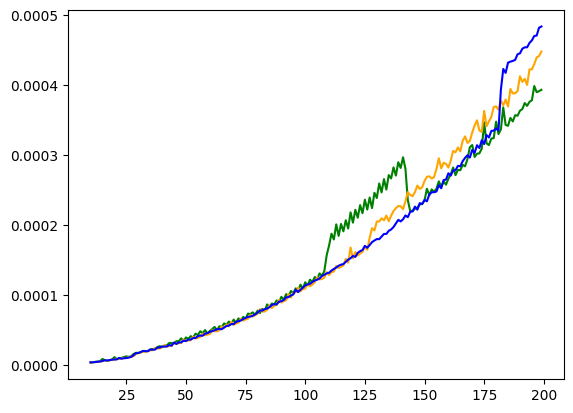

In [73]:
plt.plot(range_bounds, selection_times, color = "green")
plt.plot(range_bounds, selection_times_reverse, color = "orange")
plt.plot(range_bounds, selection_times_already_sorted, color = "blue")

Наступний алгоритм - insertion sort. За принципом роботи він схожий на перемішування карт у руці.

Асимптотична складність:

* Найгірший випадок: O(n**2)
* Найкращий випадок: O(n)
* Середній випадок: O(n**2)

[Народний танок для ілюстрації алгоритму](https://youtu.be/EdIKIf9mHk0?list=PLOmdoKois7_FK-ySGwHBkltzB11snW7KQ)

In [74]:
def insertion_sort(arr):
    size = len(arr)
    for i in range(1, size):
        j = i - 1
        key = arr[i]
        while arr[j] > key and j >= 0:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

In [75]:
random.shuffle(original_lst)
print(original_lst)
insertion_sort(original_lst)
print(original_lst)

[360, 932, 621, 615, 229, 850, 750, 305, 120, 965, 316, 523, 335, 614, 720, 797, 678, 595, 15, 436, 228, 112, 501, 387, 768, 955, 806, 222, 610, 560, 284, 399, 9, 367, 813, 707, 823, 954, 299, 781, 294, 540, 435, 875, 572, 994, 424, 993, 734, 962, 44, 350, 878, 78, 632, 765, 552, 205, 633, 391, 877, 558, 422, 731, 254, 396, 608, 353, 714, 885, 693, 646, 437, 812, 684, 434, 736, 248, 236, 88, 530, 189, 130, 212, 995, 796, 392, 638, 93, 689, 639, 280, 841, 196, 727, 337, 158, 157, 687, 261, 64, 361, 441, 808, 656, 374, 489, 407, 135, 909, 176, 559, 46, 250, 34, 136, 848, 729, 56, 868, 930, 319, 650, 512, 177, 133, 945, 891, 625, 902, 922, 504, 108, 111, 429, 726, 80, 271, 443, 10, 150, 109, 746, 240, 430, 561, 664, 32, 773, 513, 143, 984, 427, 520, 265, 751, 447, 380, 804, 505, 817, 563, 201, 853, 931, 249, 579, 226, 793, 677, 862, 464, 328, 285, 809, 810, 403, 167, 528, 203, 318, 676, 290, 671, 576, 952, 606, 426, 264, 105, 802, 620, 728, 469, 468, 100, 672, 239, 55, 33, 944, 372, 762, 

In [76]:
%%timeit

random.shuffle(original_lst)
insertion_sort(original_lst)

11.8 ms ± 114 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [77]:
RANGE_BOUND_MAX = 200
TESTS_NUM = 1000

range_bounds = list(range(10, RANGE_BOUND_MAX))

In [78]:
insertion_times: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list, shuffle_pure_func)
insertion_times_reverse: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list, reverse_arr)
insertion_times_already_sorted: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list)

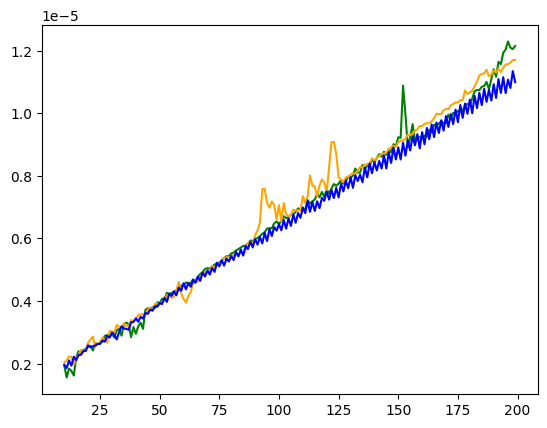

In [79]:
plt.plot(range_bounds, insertion_times, color = "green")
plt.plot(range_bounds, insertion_times_reverse, color = "orange")
plt.plot(range_bounds, insertion_times_already_sorted, color = "blue")

In [80]:
RANGE_BOUND_START = 10
RANGE_BOUND_MAX = 1000
TESTS_NUM = 50

range_bounds = list(range(RANGE_BOUND_START, RANGE_BOUND_MAX))

In [81]:
insertion_times_big_arr: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list, shuffle_pure_func)


In [82]:
insertion_times_reverse_big_arr: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list, reverse_arr)

In [83]:
insertion_times_already_sorted_big_arr: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list)

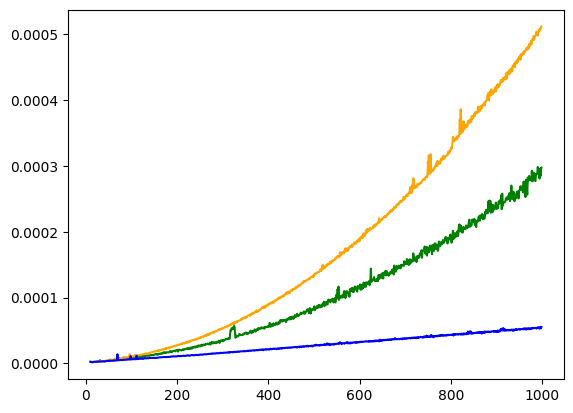

In [84]:
plt.plot(range_bounds, insertion_times_big_arr, color = "green")
plt.plot(range_bounds, insertion_times_reverse_big_arr, color = "orange")
plt.plot(range_bounds, insertion_times_already_sorted_big_arr, color = "blue")

Сортування вставками має декілька важливих властивостей:

* Це in-place алгоритм (споживає тільки О(1) пам'яті). Це ж поширюється і на selection sort.
* Це стабільний алгоритм (якщо ви відсортуєте список об'єктів спочатку за одним полем, а потім за іншим, порядок, встановлений за першим полем, буде збережено)
* Це онлайн-алгоритм (він здатен сортувати без отримання всього набору елементів за раз)
* Цей алгоритм працює за **лінійний час** на так званих частково відсортованих послідовностях (вона є такою, якщо елемент знаходиться не більше ніж у k позиціях від істиної). Повна оцінка тоді буде O(k*n)

Сортування вставками іноді використовується як додаткова частина гібридних алгоритмів сортування (наприклад у стандартному алгоритмі сортування Python під назвою Timsort)

Існує узагальнення сортування вставками, що дозволяє порівнювати нам елементи на відстані більше ніж 1. Воно носить назву сортування Шелла.

Асимптотична складність:

* Найгірший випадок - O(n**2)
* Найкращий випадок - O(n*log(n))
* Середній випадок - **невідомий**

[Народний танок для ілюстрації алгоритму](https://youtu.be/yn0EgXHb5jc?list=PLOmdoKois7_FK-ySGwHBkltzB11snW7KQ)

Власне, сам принцип сортування Шелла базується на порівнянні елементів, що рівновіддалені на деяке число k по індексу. Після проходження до кінця масиву, цей k зменшується певним чином, щоб, в кінці кінців, сталося порівняння кожного елементу з наступним. Відомо, що асимптотична складність сортування Шелла дуже сильно залежить саме від виду цих послідовностей. Для імплементації нижче використана так звана послідовність Кнута.

In [85]:
from typing import List, TypeVar

T = TypeVar("T")


def shell_sort(array_to_sort: List[T]) -> None:
    """From the signature we know that our method does not return anything.
    Basically it performs the side effect: it sorts the variable array_to_sort and treats it as mutable"""
    array_length: int = len(array_to_sort)
    shell_sort_step: int = 1
    # Recursively founding the closest member of Knuths sequence
    while shell_sort_step <= array_length // 3:
        shell_sort_step = 3 * shell_sort_step + 1
    while shell_sort_step > 0:
        # First loop maintains the Shellsort step ascending sequence
        for pointer in range(shell_sort_step, array_length, 1):
            # Second loop maintains the pointer for each h-sorting iterations
            # It's important to maintain the item_to_compare variable as it
            # stores our value for compare with other memmbers of h-sequence
            item_to_compare: T = array_to_sort[pointer]
            for decremented_pointer in range(pointer, 0, -shell_sort_step):
                # Third loop maintains insertion sort with the step value h.
                # It will iterate through the whole array with step h.
                preceeding_item: T = array_to_sort[
                    decremented_pointer - shell_sort_step
                ]
                item: T = array_to_sort[decremented_pointer]
                if preceeding_item > item:
                    # We are doing the swap in the following technique because we need to swap within array
                    array_to_sort[decremented_pointer] = preceeding_item
                    array_to_sort[decremented_pointer - shell_sort_step] = item
                if preceeding_item < item_to_compare:
                    # When we found the item which less than item we compare, we stop the swap process
                    array_to_sort[decremented_pointer] = item_to_compare
                    break
        shell_sort_step = shell_sort_step // 3

In [86]:
random.shuffle(original_lst)
print(original_lst)
shell_sort(original_lst)
print(original_lst)

[414, 189, 50, 574, 511, 326, 885, 17, 449, 651, 316, 77, 636, 530, 687, 253, 34, 599, 545, 337, 565, 773, 477, 775, 238, 756, 481, 523, 339, 797, 953, 868, 745, 591, 161, 314, 335, 260, 465, 264, 527, 388, 706, 467, 588, 352, 476, 173, 492, 988, 360, 812, 556, 136, 63, 819, 874, 558, 123, 899, 862, 533, 630, 883, 300, 992, 113, 700, 16, 472, 729, 89, 79, 838, 915, 783, 509, 635, 271, 963, 198, 350, 933, 717, 979, 728, 913, 127, 351, 400, 672, 364, 789, 25, 144, 193, 444, 629, 346, 445, 214, 307, 676, 820, 615, 772, 354, 252, 891, 156, 122, 203, 785, 410, 837, 581, 426, 749, 959, 861, 515, 18, 696, 143, 202, 713, 965, 243, 358, 605, 641, 609, 989, 459, 76, 623, 563, 612, 966, 506, 777, 639, 633, 647, 693, 197, 291, 991, 387, 170, 42, 456, 532, 632, 746, 827, 592, 494, 704, 662, 621, 128, 847, 35, 431, 325, 310, 788, 575, 830, 134, 932, 365, 331, 587, 411, 593, 601, 121, 265, 88, 424, 856, 72, 776, 371, 941, 834, 199, 564, 653, 748, 584, 922, 758, 939, 475, 961, 480, 491, 859, 870, 690,

In [87]:
%%timeit

random.shuffle(original_lst)
shell_sort(original_lst)

3.45 ms ± 90 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [88]:
shell_sort_big_arr: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list, shuffle_pure_func)


In [89]:
shell_sort_reverse_big_arr: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list, reverse_arr)

In [90]:
shell_sort_already_sorted_big_arr: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list)

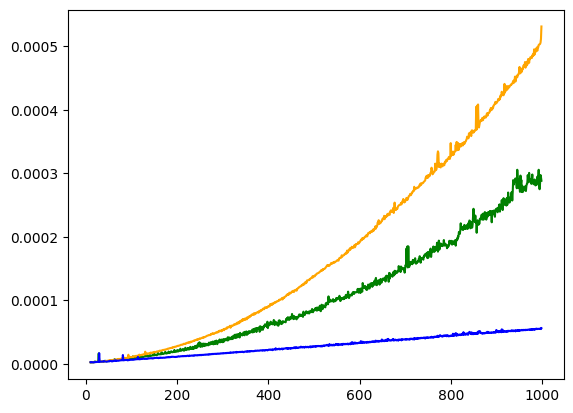

In [91]:
plt.plot(range_bounds, shell_sort_big_arr, color = "green")
plt.plot(range_bounds, shell_sort_reverse_big_arr, color = "orange")
plt.plot(range_bounds, shell_sort_already_sorted_big_arr, color = "blue")

Сортування Шелла:
* Адаптивне (працює швидше якщо вхідні дані частково відсортовані, див. сортування вставкою)
* Нестабільне

Наступний алгоритм - merge sort. 

Асимптотична оцінка:

* Найгірший випадок: O(n*log(n))
* Найкращий випадок: O(n*log(n))
* Середній випадок: O(n*log(n))

[Народний танок](https://youtu.be/dENca26N6V4?list=PLOmdoKois7_FK-ySGwHBkltzB11snW7KQ)

З точки зору дизайну алгоритмів, сортування злиттям є еталонним прикладом техніки divide-and-conquer. Алгоритми цього типу складаються з трьох частин:

* Divide - розбити проблему на підчастини
* Conquer - вирішити проблему для кожної частини окремо
* Combine - зібрати загальне рішення з результатів попереднього етапу

In [92]:
from typing import List, TypeVar

T = TypeVar("T")


def merge_sort(arr: List[T]) -> None:
    """From the signature we know that our method does not return anything.
    Basically it performs the side effect: it sorts the variable arr and treats it as mutable"""
    if len(arr) > 1:
        mid_index: int = len(arr) // 2
        #DIVIDE
        left_subarray: List[T] = arr[:mid_index]
        right_subarray: List[T] = arr[mid_index:]
        #CONQUER
        merge_sort(left_subarray)
        merge_sort(right_subarray)
        #COMBINE
        merge(arr, left_subarray, right_subarray)


def merge(
    arr: List[T], left_subarray: List[T], right_subarray: List[T]
) -> None:
    # Two iterators for traversing the two halves
    left_pointer: int = 0
    right_pointer: int = 0

    # Iterator for the main list
    original_array_pointer: int = 0

    while left_pointer < len(left_subarray) and right_pointer < len(right_subarray):
        if left_subarray[left_pointer] <= right_subarray[right_pointer]:
            # The value from the left half has been used
            arr[original_array_pointer] = left_subarray[left_pointer]
            # Move the iterator forward
            left_pointer += 1
        else:
            arr[original_array_pointer] = right_subarray[right_pointer]
            # The value from right half has been used
            right_pointer += 1
        # Move to the next slot in main array
        original_array_pointer += 1

    # For all the remaining values in either left or right array
    # we perform merge as we know that they are greater than already merged values
    while left_pointer < len(left_subarray):
        arr[original_array_pointer] = left_subarray[left_pointer]
        left_pointer += 1
        original_array_pointer += 1

    while right_pointer < len(right_subarray):
        arr[original_array_pointer] = right_subarray[right_pointer]
        right_pointer += 1
        original_array_pointer += 1

In [93]:
random.shuffle(original_lst)
print(original_lst)
merge_sort(original_lst)
print(original_lst)

[43, 789, 558, 733, 682, 926, 495, 951, 825, 273, 254, 383, 868, 758, 727, 325, 142, 484, 890, 939, 135, 379, 194, 46, 493, 150, 349, 854, 654, 453, 214, 763, 151, 433, 967, 70, 773, 968, 136, 980, 503, 421, 79, 665, 83, 608, 307, 82, 294, 704, 279, 206, 499, 719, 820, 702, 208, 873, 491, 594, 78, 864, 357, 195, 688, 716, 296, 807, 906, 893, 322, 147, 398, 895, 114, 200, 419, 569, 754, 785, 663, 407, 327, 923, 108, 823, 416, 562, 901, 659, 8, 461, 216, 641, 811, 884, 638, 879, 999, 577, 790, 757, 405, 796, 340, 858, 557, 846, 506, 574, 133, 794, 210, 883, 709, 120, 579, 220, 686, 962, 547, 404, 620, 959, 252, 339, 158, 429, 315, 342, 488, 866, 139, 474, 707, 998, 219, 737, 606, 324, 903, 701, 576, 123, 403, 205, 953, 958, 597, 947, 481, 759, 718, 822, 711, 625, 6, 98, 40, 549, 442, 850, 650, 660, 302, 134, 887, 468, 462, 975, 156, 749, 810, 952, 274, 783, 955, 228, 795, 102, 110, 125, 555, 530, 818, 692, 588, 91, 392, 348, 393, 87, 876, 774, 661, 222, 545, 766, 146, 388, 66, 706, 35, 5

In [94]:
%%timeit

random.shuffle(original_lst)
merge_sort(original_lst)

1.28 ms ± 19.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [95]:
merge_sort_big_arr: List[float] = time_algs_by_mean(merge_sort, TESTS_NUM, range_bounds, list, shuffle_pure_func)

In [96]:
merge_sort_reverse_big_arr: List[float] = time_algs_by_mean(merge_sort, TESTS_NUM, range_bounds, list, reverse_arr)

In [97]:
merge_sort_already_sorted_big_arr: List[float] = time_algs_by_mean(merge_sort, TESTS_NUM, range_bounds, list)

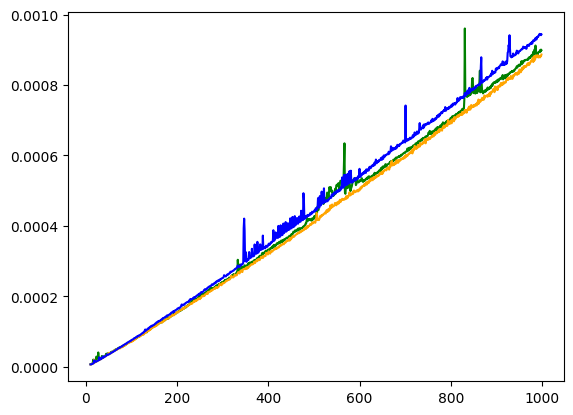

In [98]:
plt.plot(range_bounds, merge_sort_big_arr, color = "green")
plt.plot(range_bounds, merge_sort_reverse_big_arr, color = "orange")
plt.plot(range_bounds, merge_sort_already_sorted_big_arr, color = "blue")

Властивості merge sort:

* Стабільність
* НЕ-inplace (O(n) додаткової спожитої пам'яті). In-place імплементації **теоретично** можливі, але вважаються занадто складними для реалізації

Існує теорема з доволі простим доведенням про верхню межу **кількості порівнянь** для будь якого comparison-based алгоритму сортування.
Ця верхня межа дорівнює **O(n*log(n))** (насправді, там використовується нотація Big Omega).

Це слідує з кількості можливих перестановок в масиві і побудованому дереві прийняття рішень (можемо розібрати, якщо цікаво).

Всі розглянуті в цьому уроці алгоритми сортування є comparison-based. 

З цієї теореми є наслідок: merge sort і heap sort (поза нашим розглядом) є **асимптотично оптимальними** порівняльними алгоритмами сортування, тому що їхній перфоманс **у найгіршому випадку** описується як О(n*log(n)).

Але це не значить, що merge sort або heapsort є **найшвидшими** алгоритмом у **середньому** та **найкращому** випадках. У найкращому випадку їх може "обігнати" insertion sort.

У середньому випадку існує як мінімум один comparison-based алгоритм, котрий фактично є швидшим від усі інші відомі порівняльні алгоритми. Він носить назву **quicksort**.

In [99]:
from random import choice

T = TypeVar("T")


def quicksort_not_inplace(arr: List[T]) -> List[T]:
    """This quicksort implementation is NOT IN PLACE. 
    It uses O(n) additional memory!!
    But it works really fast in Python and it's easy to implement"""
    if len(arr) == 0: 
        return list()
    pivot = arr[0]
    l = quicksort_not_inplace([x for x in arr[1:] if x < pivot])
    u = quicksort_not_inplace([x for x in arr[1:] if x >= pivot])
    return l + [pivot] + u


In [117]:
from typing import List, TypeVar
from random import randint

T = TypeVar("T")


def shuffle(arr: List[T]) -> None:
    """Simple implementation for Fisher-Yates shuffle algo"""
    array_length: int = len(arr)
    for index in range(array_length - 1, 0, -1):
        random_index: int = randint(0, index)
        arr[index], arr[random_index] = arr[random_index], arr[index]


def partition(arr, begin, end):
    pivot = begin
    for i in range(begin + 1, end + 1):
        if arr[i] <= arr[begin]:
            pivot += 1
            arr[i], arr[pivot] = arr[pivot], arr[i]
    arr[pivot], arr[begin] = arr[begin], arr[pivot]
    return pivot


def quicksort(arr, begin=0, end=None):
    shuffle(arr)
    if end is None:
        end = len(arr) - 1

    def _quicksort(arr, begin, end):
        if begin >= end:
            return
        pivot = partition(arr, begin, end)
        _quicksort(arr, begin, pivot - 1)
        _quicksort(arr, pivot + 1, end)

    return _quicksort(arr, begin, end)

Асимптотична оцінка:

* Найгірший випадок: O(n**2), в основному коли масив відсортований (у будь який бік)
* Найкращий випадок: O(n*log(n))
* Середній випадок: O(n*log(n))

* Додаткова пам'ять: O(log(n)), O(n) для наївної імплементації

[Народний танок](https://www.youtube.com/watch?v=3San3uKKHgg)

In [112]:
random.shuffle(original_lst)
print(original_lst)
print(quicksort_not_inplace(original_lst))

[912, 854, 17, 396, 337, 633, 901, 114, 766, 515, 164, 198, 243, 452, 40, 182, 760, 0, 799, 754, 482, 154, 851, 93, 958, 284, 149, 351, 179, 252, 704, 751, 868, 451, 353, 234, 588, 765, 246, 35, 661, 319, 535, 828, 325, 824, 722, 920, 701, 906, 956, 335, 372, 253, 984, 486, 879, 431, 623, 231, 269, 360, 563, 280, 78, 663, 299, 626, 883, 742, 884, 928, 261, 310, 5, 313, 126, 15, 929, 743, 257, 797, 590, 665, 985, 438, 767, 397, 245, 996, 694, 979, 499, 101, 520, 607, 473, 390, 775, 187, 871, 711, 441, 19, 809, 617, 383, 621, 813, 481, 496, 369, 949, 324, 36, 37, 536, 302, 88, 747, 221, 666, 894, 937, 95, 288, 89, 21, 321, 440, 542, 100, 472, 625, 268, 117, 236, 822, 821, 881, 42, 382, 990, 504, 836, 969, 566, 393, 618, 442, 543, 970, 745, 426, 223, 922, 793, 471, 110, 68, 489, 769, 405, 759, 1, 874, 936, 196, 668, 977, 516, 380, 135, 658, 948, 875, 961, 143, 537, 533, 892, 158, 859, 673, 973, 702, 835, 311, 796, 186, 882, 419, 96, 951, 315, 26, 989, 934, 202, 341, 329, 692, 900, 200, 67

In [115]:
random.shuffle(original_lst)
print(original_lst)
quicksort(original_lst)
print(original_lst)

[510, 45, 206, 929, 570, 916, 182, 592, 227, 275, 379, 551, 723, 611, 247, 984, 278, 102, 613, 48, 754, 794, 93, 284, 473, 682, 300, 750, 635, 919, 376, 583, 432, 542, 848, 636, 113, 847, 161, 624, 184, 153, 64, 477, 361, 192, 939, 344, 565, 55, 961, 663, 601, 191, 775, 630, 529, 944, 365, 512, 77, 800, 840, 599, 778, 659, 314, 686, 933, 174, 992, 73, 532, 672, 119, 257, 267, 34, 274, 689, 812, 276, 696, 142, 46, 827, 881, 903, 680, 590, 85, 296, 407, 328, 149, 427, 118, 94, 737, 617, 835, 950, 577, 488, 378, 580, 879, 733, 779, 19, 763, 660, 185, 893, 137, 329, 398, 882, 575, 290, 986, 269, 392, 934, 889, 688, 821, 112, 456, 442, 768, 870, 437, 587, 826, 815, 625, 607, 446, 353, 536, 57, 595, 729, 674, 846, 869, 489, 588, 271, 705, 327, 519, 609, 647, 844, 913, 54, 359, 12, 33, 478, 226, 100, 743, 772, 70, 186, 978, 732, 738, 671, 163, 614, 123, 350, 219, 68, 706, 915, 734, 475, 176, 373, 90, 860, 462, 301, 360, 721, 894, 305, 148, 387, 44, 421, 619, 352, 676, 524, 788, 346, 731, 116,

In [101]:
%%timeit

random.shuffle(original_lst)
merge_sort(original_lst)

1.37 ms ± 32.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [102]:
quicksort_big_arr: List[float] = time_algs_by_mean(quicksort_not_inplace, TESTS_NUM, range_bounds, list, shuffle_pure_func)

In [118]:
quicksort_big_arr_inplace: List[float] = time_algs_by_mean(quicksort, TESTS_NUM, range_bounds, list, shuffle_pure_func)

In [103]:
quicksort_reverse_big_arr: List[float] = time_algs_by_mean(quicksort_not_inplace, TESTS_NUM, range_bounds, list, reverse_arr)

In [104]:
quicksort_already_sorted_big_arr: List[float] = time_algs_by_mean(quicksort_not_inplace, TESTS_NUM, range_bounds, list)

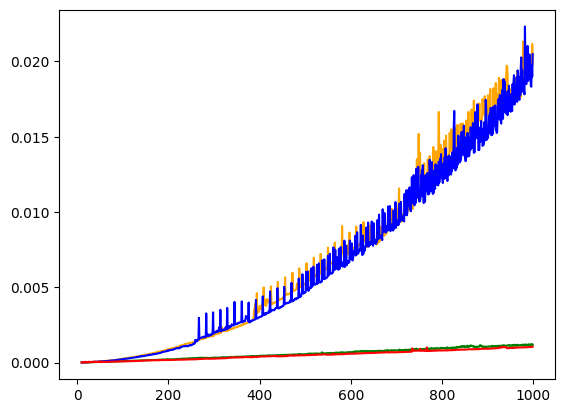

In [119]:
plt.plot(range_bounds, quicksort_big_arr, color = "green")
plt.plot(range_bounds, quicksort_reverse_big_arr, color = "orange")
plt.plot(range_bounds, quicksort_already_sorted_big_arr, color = "blue")
plt.plot(range_bounds, quicksort_big_arr_inplace, color = "red")

Властивості:

* НЕ стабільний (але існують стабільні модифікації)
* In-place (не робить зайвих копій вхідних даних, хоча можливі не-in-place імплементації)
* Divide-and-conquer
* З урахуванням усіх констант є найшвидшим з comparison-based алгоритмів в **середньому** випадку **на нескінченності**